### Data Load

In [1]:
import pandas as pd

# Read the csv dataset
df = pd.read_csv('parkinsons.csv', delimiter =',')

# Separate the features from the outcome
X = df.drop('target', axis=1)
y = df['target']

### 5.

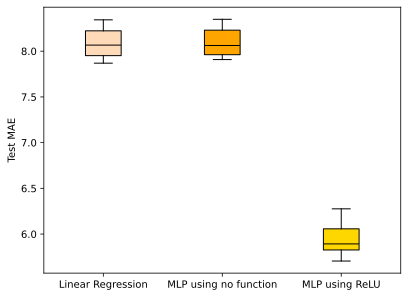

In [2]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning

# Igonre Converge warning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

runs = 10
neurons = 10
hidden_layers = 2

lr_mae, mlp_mae, mlp_relu_mae = [], [], []
for run in range(runs):
    # Split the data in training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=(run+1))
    # Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred_lr = lr.predict(X_test)
    # Compute MAE
    lr_mae.append(metrics.mean_absolute_error(y_test, pred_lr))
    # MLP model with no activation functiom
    mlp = MLPRegressor(hidden_layer_sizes=[neurons for _ in range(hidden_layers)], activation='identity', random_state=0)
    mlp.fit(X_train, y_train)
    pred_mlp = mlp.predict(X_test)
    # Compute MAE
    mlp_mae.append(metrics.mean_absolute_error(y_test, pred_mlp))
    # MLP model with relu activation function
    mlp = MLPRegressor(hidden_layer_sizes=[neurons for _ in range(hidden_layers)], random_state=0)
    mlp.fit(X_train, y_train)
    pred_mlp_relu = mlp.predict(X_test)
    # Compute MAE
    mlp_relu_mae.append(metrics.mean_absolute_error(y_test, pred_mlp_relu))
maes = [lr_mae, mlp_mae, mlp_relu_mae]

# Plot the test MAE boxplot for each model
labels = ['Linear Regression', 'MLP using no function', 'MLP using ReLU']
colors = ['peachpuff', 'orange', 'gold']

fig, ax = plt.subplots()
ax.set_ylabel ('Test MAE')

bplot = ax.boxplot (maes, patch_artist=True, tick_labels=labels)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

plt.show ()

### 7.

Best combination: {'L2 penalty': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}


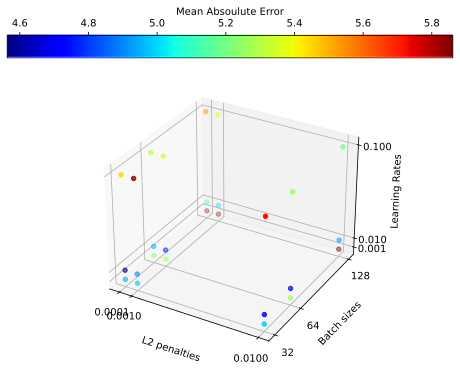

In [3]:
%config InlineBackend.figure_formats = ['svg']

from sklearn.model_selection import GridSearchCV

l2_penalties = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
hyperparameters = {'alpha':l2_penalties, 'batch_size':batch_sizes, 'learning_rate_init':learning_rates,}

# Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# MLP model with relu activation function (default)
mlp = MLPRegressor(hidden_layer_sizes=[neurons for _ in range(hidden_layers)], random_state=0)

# Perform a grid search to tune the given hyperparameters
search = GridSearchCV(mlp, hyperparameters, scoring='neg_mean_absolute_error')
search.fit(X_train, y_train)

# Best combination of hyperparameters
print(f'Best combination: {str(search.best_params_).replace('alpha', 'L2 penalty')}')

# Grid Search results dictionary
results = search.cv_results_

# get the coordinates for each axis     
l2_penalties_order, learning_rates_order, batch_sizes_order = [], [], []
for combination in results['params']:
    l2_penalties_order.append(combination['alpha'])
    batch_sizes_order.append(combination['batch_size'])
    learning_rates_order.append(combination['learning_rate_init'])

# Plots the MAE for each combination of hyperparameters
# Uses a colormap to simulate a 4D plot
fig = plt.figure(figsize=(8,6.4))
ax = fig.add_subplot(111, projection='3d')

# minus results because by convention, higher return values are better than lower return values
img = ax.scatter(l2_penalties_order, batch_sizes_order, learning_rates_order, c=-results['mean_test_score'], cmap='jet')
ax.set(xlabel='L2 penalties', ylabel='Batch sizes', zlabel='Learning Rates', xticks=l2_penalties, yticks=batch_sizes, zticks=learning_rates)
fig.colorbar(img, label='Mean Absoulute Error', location='top')

plt.show()
